In [64]:
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv('../../data/birds/2022-2023.csv')
df.dropna(subset=['Latitude', 'Longitude'], inplace=True)
df.head()

,ScientificName,TaxonID,Date,Latitude,Longitude,Municipality
0,Bombycilla garrulus,http://tun.fi/MX.32608,2022-01-05,60.1758,24.9449,Helsinki
1,Accipiter nisus,http://tun.fi/MX.26639,2022-01-14,60.3889,25.6731,Porvoo
2,Corvus monedula,http://tun.fi/MX.37142,2022-05-03,60.2239,25.0157,Helsinki
3,Gallinula chloropus,http://tun.fi/MX.27364,2022-04-22,60.1860,24.7420,Espoo
4,Phasianus colchicus,http://tun.fi/MX.27152,2022-02-01 - 2022-02-28,60.9087,24.5218,Janakkala


In [66]:
import sys
sys.path.append('../')
from helper_functions.gridding import h3_grid

In [67]:
grid_object = h3_grid()
grid_object.fit(df)
grid_info_df = grid_object.grid_info()
grid_info_df.head()

,h3_cell,observations_id,count,neighbors
0,85012603fffffff,"[114299, 146989, 148219, 327838, 327871, 33895...",210,"{8501261bfffffff, 85012603fffffff, 85012613fff..."
1,85012613fffffff,"[11833, 11958, 11959, 11960, 11961, 11962, 119...",168,"{8501261bfffffff, 85012603fffffff, 85012613fff..."
2,85012617fffffff,"[42433, 129509, 156205, 267275, 279194, 304666...",25,"{85012603fffffff, 85012613fffffff, 850126abfff..."
3,8501261bfffffff,"[10758, 13560, 13564, 13566, 13567, 13582, 135...",161,"{8501261bfffffff, 85012603fffffff, 85012613fff..."
4,85012643fffffff,"[3166, 9750, 9780, 9984, 12593, 19003, 28976, ...",80,"{85012653fffffff, 85012643fffffff, 8501264ffff..."


In [68]:
def group_observations (dataframe, columns):
    grouped_df = dataframe.groupby(columns).count()
    grouped_df.reset_index(inplace = True)
    columns_to_drop = list(filter(lambda name : name not in columns, grouped_df.columns))
    grouped_df = grouped_df.drop(columns = columns_to_drop[1:])
    grouped_df.columns = columns + ["nof_obs"]
    return grouped_df

# scientificName or taxonId works
grouped_df = group_observations(df, ['h3_cell', 'ScientificName'])

def pivot_obs_dataframe (dataframe, species_identifier, area_id):
    pivoted_df = dataframe.pivot(index = area_id, columns = species_identifier, values = "nof_obs")
    pivoted_df = pivoted_df.fillna(0.0)
    return pivoted_df

pivoted_df = pivot_obs_dataframe(grouped_df, "ScientificName", "h3_cell")
pivoted_df

ScientificName,Acanthis,Accipiter,Accipiter gentilis gentilis,Accipiter nisus,Accipitridae,Accipitriformes,Acrocephalidae,Acrocephalus,Acrocephalus agricola,Acrocephalus arundinaceus,...,Upupa epops,Uria,Uria aalge,Vanellus gregarius,Vanellus vanellus,magnus Accipitriformes,medium Picidae,parvus Accipitriformes,parvus Anatidae,parvus Falco
h3_cell,,,,,,,,,,,,,,,,,,,,,
85012603fffffff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85012613fffffff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85012617fffffff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8501261bfffffff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85012643fffffff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85112ecffffffff,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
85112ed3fffffff,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0
85112ed7fffffff,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [69]:
def onehot_encode (col):
    col_numpy = col.to_numpy()
    col_numpy[col_numpy > 0.0] = 1.0
    return col_numpy

onehot_df = pivoted_df.apply(onehot_encode)
X = np.array([list(onehot_df[column].values) for column in onehot_df.columns])
n_samples, n_features = X.shape
print(n_samples)
print(n_features)

533
1989


In [48]:

distance_matrix = pairwise_distances(X, metric = 'jaccard')

c:\Users\LAM HAI YEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\pairwise.py:2181: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [70]:
distance_matrix = pairwise_distances(X, metric = 'jaccard')
min_distance = np.min(distance_matrix[np.nonzero(distance_matrix)])
max_distance = np.max(distance_matrix[np.nonzero(distance_matrix)])
print(min_distance)
print(max_distance)

c:\Users\LAM HAI YEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\pairwise.py:2181: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


0.07659574468085106
1.0


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [102.5, 102.5, 132.5, 132.5],
  [155.0, 155.0, 165.0, 165.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [245.0, 245.0, 262.5, 262.5],
  [230.0, 230.0, 253.75, 253.75],
  [210.0, 210.0, 241.875, 241.875],
  [182.5, 182.5, 225.9375, 225.9375],
  [160.0, 160.0, 204.21875, 204.21875],
  [117.5, 117.5, 182.109375, 182.109375],
  [285.0, 285.0, 295.0, 295.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [335.0, 335.0, 345.0, 345.0],
  [375.0, 375.0, 385.0, 385.0],
  [365.0, 365.0, 380.0, 380.0],
  [355.0, 355.0, 372.5, 372.5],
  [415.0, 415.0, 425.0, 

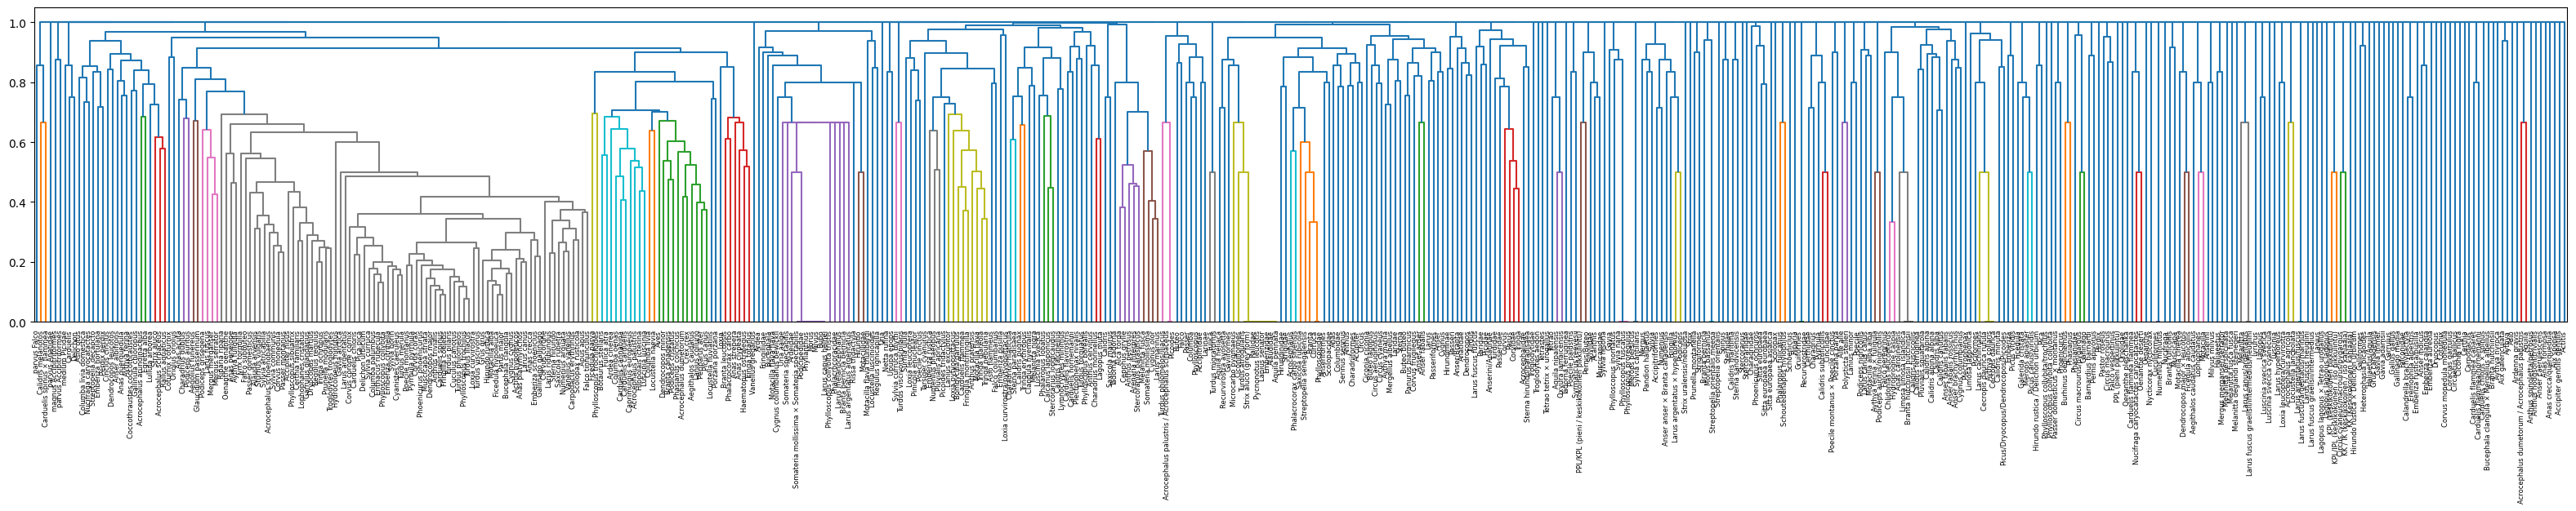

In [71]:
# Calculate the linkage: mergings
mergings = linkage(X, method='complete', metric = 'jaccard')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(40, 5))
dendrogram(mergings,
           labels=pivoted_df.columns,
           leaf_rotation=90,
           leaf_font_size=6,
          )

In [74]:
clusters = fcluster(mergings, t = 0.7, criterion='distance')
np.max(clusters)

329

In [78]:
clusters_to_species = {}
species_arr = np.array(pivoted_df.columns)
for i in range(1, np.max(clusters) + 1):
    clusters_to_species[i] = list(species_arr[clusters == i])
clusters_to_species

{1: ['Calidris melanotos', 'Carduelis spinus × flammea'],
 2: ['parvus Falco'],
 3: ['magnus Accipitriformes'],
 4: ['parvus Accipitriformes'],
 5: ['Carduelis'],
 6: ['Delichon'],
 7: ['medium Picidae'],
 8: ['Columba livia domestica'],
 9: ['Nucifraga caryocatactes'],
 10: ['Asio otus'],
 11: ['Emberiza hortulana'],
 12: ['Perdix perdix'],
 13: ['Streptopelia decaocto'],
 14: ['Cinclus cinclus'],
 15: ['Dendrocopos leucotos'],
 16: ['Anas querquedula'],
 17: ['Aythya ferina'],
 18: ['Anser albifrons'],
 19: ['Coccothraustes coccothraustes'],
 20: ['Gallinula chloropus'],
 21: ['Acrocephalus arundinaceus', 'Egretta alba'],
 22: ['Acrocephalus scirpaceus', 'Rallus aquaticus', 'Strix aluco'],
 23: ['Lullula arborea'],
 24: ['Coturnix coturnix'],
 25: ['Oriolus oriolus'],
 26: ['Charadrius dubius', 'Podiceps auritus'],
 27: ['Anas acuta'],
 28: ['Aegolius funereus', 'Glaucidium passerinum'],
 29: ['Larus fuscus',
  'Mergus merganser',
  'Mergus serrator',
  'Podiceps grisegena'],
 30: ['

In [83]:
import json

json_object = json.dumps(clusters_to_species, indent=4)
 
with open("clusters.json", "w") as outfile:
    outfile.write(json_object)